# Exploratory Data Analysis & Basic Visualization
## Producing the final plots to be inserted on the RISE poster board


### Imported Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, MonthLocator, WeekdayLocator, MO
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

### 8 Variables

Working with 5 and 30 minute resolutions with the start time of "6/1/17 0:00" and end time of "6/30/17 23:55", there are 8 variables we will explore analyze their relationships. They are below, their definitions, and units:

- Time Stamps (UTC): format='%m/%d/%y %H:%M'
- PV Power Outputs of Residential of a Single Rooftop Solar Panels (watts)
- Ambient Temperature (°C)
- Wind Speed at 10 m above MSL (m/s)
- Wind Direction at 10 m above MSL (degrees)
- Direct Normal Irradiance (DNI): the component that is involved in thermal (concentrating solar power, CSP) and photovoltaic concentration technology (concentrated photovoltaic, CPV).
- Global Horizontal Irradiance (GHI): the sum of direct and diffuse radiation received on a horizontal plane. GHI is a reference radiation for the comparison of climatic zones; it is also essential parameter for calculation of radiation on a tilted plane.
- Global Tilt Irradiance (GTI): total radiation received on a surface with defined tilt and azimuth, fixed or sun-tracking. This is the sum of the scattered radiation, direct and reflected. It is a reference for photovoltaic (PV) applications, and can be occasionally affected by shadow.

### Predicting PV Power using Scatterplot Regression Models - Supervised Learning Models (8 total)
- Linear Regression (only for linear relationships)
    - Lasso Regression
    - Ridge Regression
- Polynomial Regression (only for polynomial relationships)
- Support Vector Regression (SVR; non-Kernel aka. linear)
- Decision Tree 
- Random Forest
- XG Boost (type of Gradient Boosting Regression)

### Time-Series Forecast Models - Supervised Learning Models (4 total tentatively)
- Long Short-Term Memory networks (LSTM)
- Prophet (ML developed by Meta)
- AutoRegressive Integrated Moving Average (ARIMA)
- Seasonal ARIMA (SARIMA)
- Best fit model(s) used in Simple Scatterplot Regression Models (one or more of the models above)

---

### Correlation Matrix (5 min resolution)

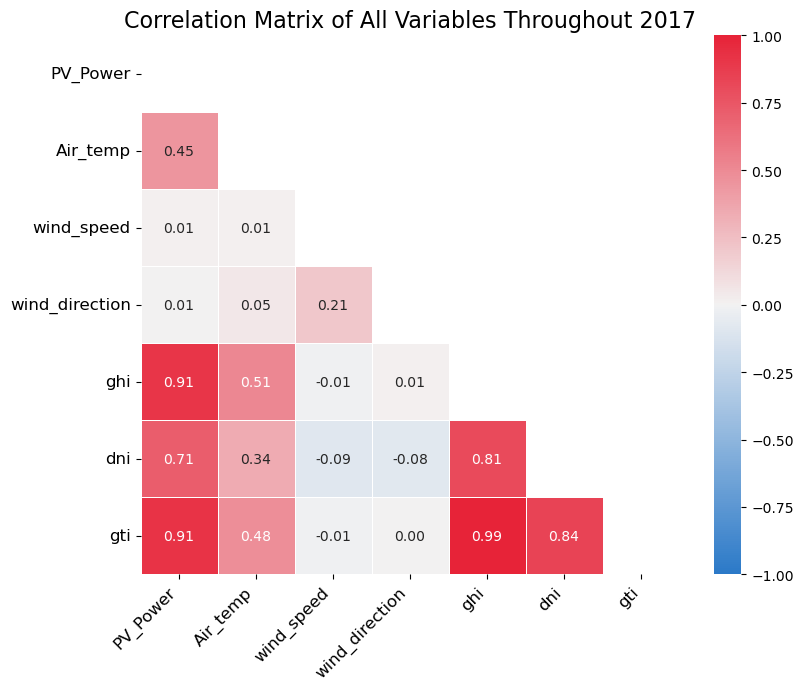

In [2]:
# Load the data from the CSV file
file_path = './FINAL_PV_POWER_5_MINS.csv'
data = pd.read_csv(file_path)

# Convert the TimeStamp column to datetime format
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'], format='%m/%d/%y %H:%M')

# Filter the data for the specified date range
start_time = '1/1/17 0:00'
end_time = '12/31/17 23:55'
mask = (data['TimeStamp'] >= start_time) & (data['TimeStamp'] <= end_time)
filtered_data = data.loc[mask]

# Drop the TimeStamp column for the correlation matrix calculation
correlation_data = filtered_data.drop(columns=['TimeStamp'])

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Define the color map
cmap = sns.diverging_palette(250, 10, s=90, l=50, as_cmap=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation matrix with the specified formatting
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": 1.0},
            annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Matrix of All Variables Throughout 2017', fontsize=16)

plt.show()

---

### Simple Scatterplot Regression - Scatterplots of All Irradiances & Air Temp vs. PV Power
#### All data is 5 min resolution (more points mean more accuracy) 

#### GHI vs. PV Power

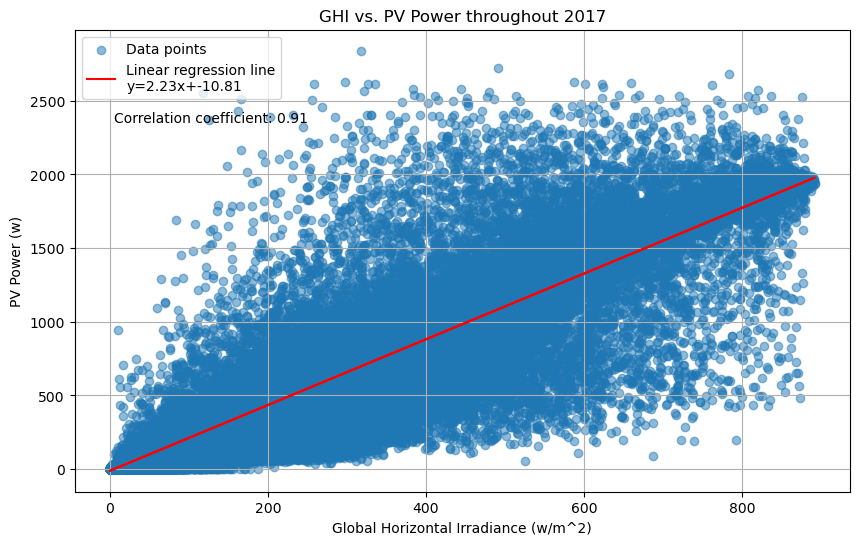

In [17]:
# Load the data
file_path = './FINAL_PV_POWER_5_MINS.csv'
data = pd.read_csv(file_path)

# Convert TimeStamp to datetime
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'], format='%m/%d/%y %H:%M')

# Filter data by date range
start_time = '2017-01-01 00:00:00'
end_time = '2017-12-31 23:55:00'
filtered_data = data[(data['TimeStamp'] >= start_time) & (data['TimeStamp'] <= end_time)]

# Remove rows with missing PV_Power values
filtered_data = filtered_data.dropna(subset=['PV_Power'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['ghi'], filtered_data['PV_Power'], alpha=0.5, label='Data points')

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_data['ghi'], filtered_data['PV_Power'])
line = slope * filtered_data['ghi'] + intercept
plt.plot(filtered_data['ghi'], line, color='red', label=f'Linear regression line\ny={slope:.2f}x+{intercept:.2f}')

# Annotations
plt.xlabel('Global Horizontal Irradiance (w/m^2)')
plt.ylabel('PV Power (w)')
plt.title('GHI vs. PV Power throughout 2017')
plt.legend()
plt.grid(True)

# Display correlation coefficient
correlation_coefficient = np.corrcoef(filtered_data['ghi'], filtered_data['PV_Power'])[0, 1]
variance = np.var(filtered_data['PV_Power'])
plt.text(0.05, 0.80, f'Correlation coefficient: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)

# Show plot
plt.show()

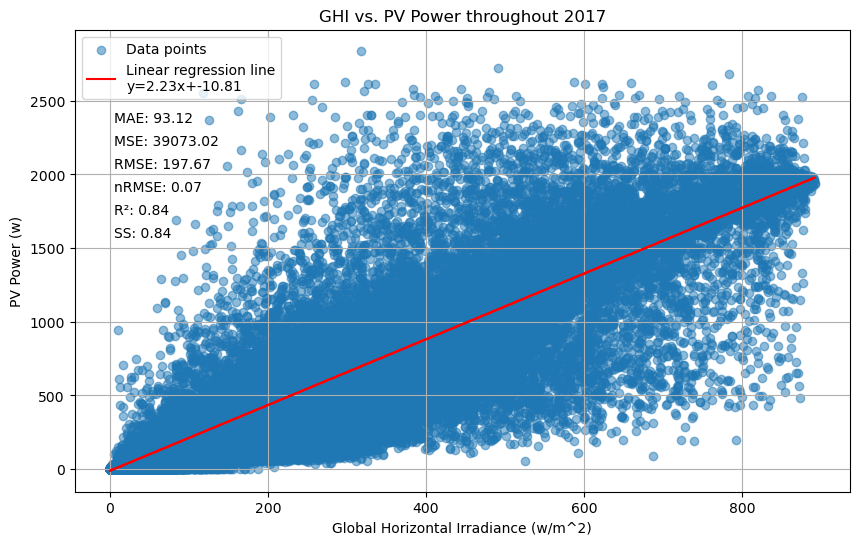

In [18]:
# Load the data
file_path = './FINAL_PV_POWER_5_MINS.csv'
data = pd.read_csv(file_path)

# Convert TimeStamp to datetime
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'], format='%m/%d/%y %H:%M')

# Filter data by date range
start_time = '2017-01-01 00:00:00'
end_time = '2017-12-31 23:55:00'
filtered_data = data[(data['TimeStamp'] >= start_time) & (data['TimeStamp'] <= end_time)]

# Remove rows with missing PV_Power values
filtered_data = filtered_data.dropna(subset=['PV_Power'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['ghi'], filtered_data['PV_Power'], alpha=0.5, label='Data points')

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_data['ghi'], filtered_data['PV_Power'])
line = slope * filtered_data['ghi'] + intercept
plt.plot(filtered_data['ghi'], line, color='red', label=f'Linear regression line\ny={slope:.2f}x+{intercept:.2f}')

# Extract the true and predicted values
y_true = filtered_data['PV_Power']
y_pred = slope * filtered_data['ghi'] + intercept

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
nrmse = rmse / (y_true.max() - y_true.min())
r2 = r2_score(y_true, y_pred)
y_naive_pred = np.full_like(y_true, np.mean(y_true))
skill_score = 1 - (mse / mean_squared_error(y_true, y_naive_pred))

# Annotations
plt.xlabel('Global Horizontal Irradiance (w/m^2)')
plt.ylabel('PV Power (w)')
plt.title('GHI vs. PV Power throughout 2017')
plt.legend()
plt.grid(True)

# Display metrics on the plot
plt.text(0.05, 0.80, f'MAE: {mae:.2f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.75, f'MSE: {mse:.2f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.70, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.65, f'nRMSE: {nrmse:.2f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.60, f'R²: {r2:.2f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.55, f'SS: {skill_score:.2f}', transform=plt.gca().transAxes)

# Show plot
plt.show()

#### GTI vs. PV Power

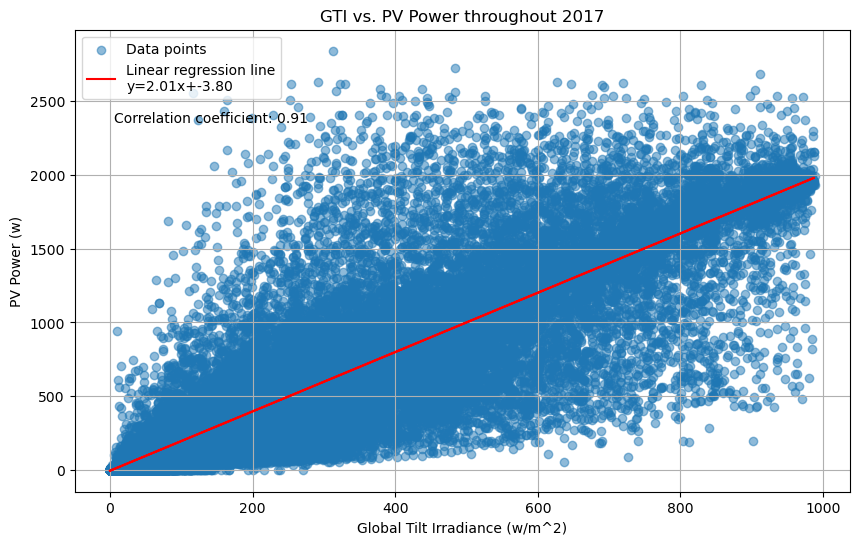

In [5]:
# Load the data
file_path = './FINAL_PV_POWER_5_MINS.csv'
data = pd.read_csv(file_path)

# Convert TimeStamp to datetime
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'], format='%m/%d/%y %H:%M')

# Filter data by date range
start_time = '2017-01-01 00:00:00'
end_time = '2017-12-31 23:55:00'
filtered_data = data[(data['TimeStamp'] >= start_time) & (data['TimeStamp'] <= end_time)]

# Remove rows with missing PV_Power values
filtered_data = filtered_data.dropna(subset=['PV_Power'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['gti'], filtered_data['PV_Power'], alpha=0.5, label='Data points')

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_data['gti'], filtered_data['PV_Power'])
line = slope * filtered_data['gti'] + intercept
plt.plot(filtered_data['gti'], line, color='red', label=f'Linear regression line\ny={slope:.2f}x+{intercept:.2f}')

# Annotations
plt.xlabel('Global Tilt Irradiance (w/m^2)')
plt.ylabel('PV Power (w)')
plt.title('GTI vs. PV Power throughout 2017')
plt.legend()
plt.grid(True)

# Display correlation coefficient
correlation_coefficient = np.corrcoef(filtered_data['gti'], filtered_data['PV_Power'])[0, 1]
variance = np.var(filtered_data['PV_Power'])
plt.text(0.05, 0.80, f'Correlation coefficient: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)

# Show plot
plt.show()

#### DNI vs. PV Power

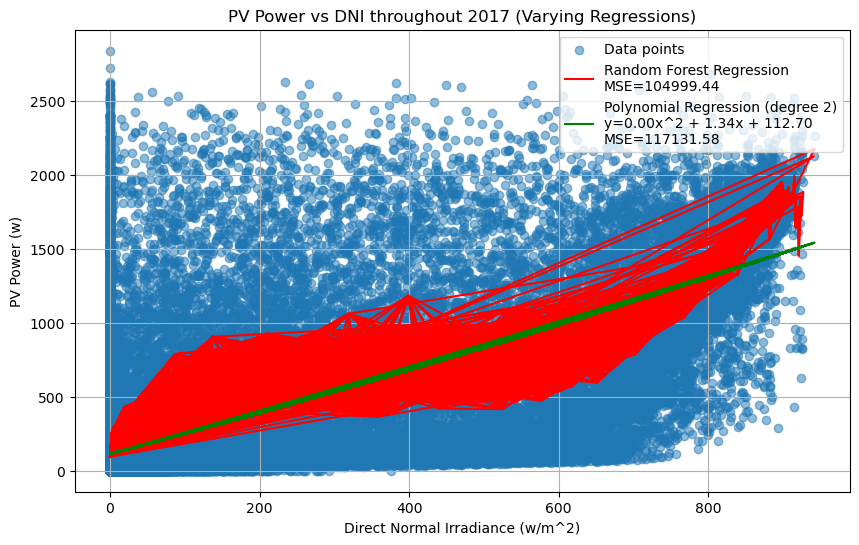

In [6]:
# Load the data
file_path = './FINAL_PV_POWER_5_MINS.csv'
data = pd.read_csv(file_path)

# Convert TimeStamp to datetime
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'], format='%m/%d/%y %H:%M')

# Filter data by date range
start_time = '2017-01-01 00:00:00'
end_time = '2017-12-31 23:55:00'
filtered_data = data[(data['TimeStamp'] >= start_time) & (data['TimeStamp'] <= end_time)]

# Drop rows where PV_Power is missing
filtered_data = filtered_data.dropna(subset=['PV_Power'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['dni'], filtered_data['PV_Power'], alpha=0.5, label='Data points')

# Random Forest Regression
X_rf = filtered_data[['dni']].values
y_rf = filtered_data['PV_Power'].values
rf = RandomForestRegressor()
rf.fit(X_rf, y_rf)
y_pred_rf = rf.predict(X_rf)
mse_rf = mean_squared_error(y_rf, y_pred_rf)

# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_rf)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_rf)
y_pred_poly = poly_reg.predict(X_poly)
mse_poly = mean_squared_error(y_rf, y_pred_poly)

# Polynomial Regression equation
coefs = poly_reg.coef_
intercept = poly_reg.intercept_
poly_eq = f'y={coefs[2]:.2f}x^2 + {coefs[1]:.2f}x + {intercept:.2f}'

# Add plots
plt.plot(filtered_data['dni'], y_pred_rf, color='red', label=f'Random Forest Regression\nMSE={mse_rf:.2f}')
plt.plot(filtered_data['dni'], y_pred_poly, color='green', label=f'Polynomial Regression (degree 2)\n{poly_eq}\nMSE={mse_poly:.2f}')

# Annotations
plt.xlabel('Direct Normal Irradiance (w/m^2)')
plt.ylabel('PV Power (w)')
plt.title('PV Power vs DNI throughout 2017 (Varying Regressions)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

#### Air Temp vs. PV Power

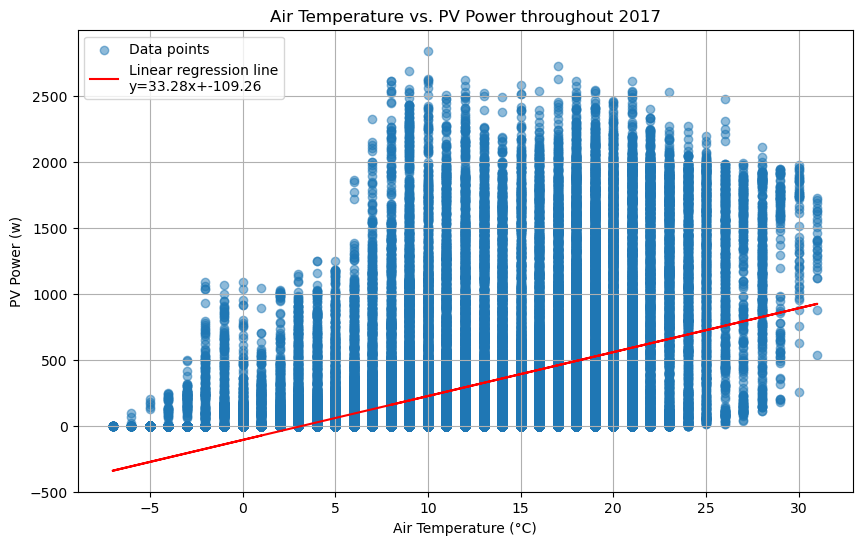

In [7]:
# Load the data
file_path = './FINAL_PV_POWER_5_MINS.csv'
data = pd.read_csv(file_path)

# Convert TimeStamp to datetime
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'], format='%m/%d/%y %H:%M')

# Filter data by date range
start_time = '2017-01-01 00:00:00'
end_time = '2017-12-31 23:55:00'
filtered_data = data[(data['TimeStamp'] >= start_time) & (data['TimeStamp'] <= end_time)]

# Remove rows with missing PV_Power values
filtered_data = filtered_data.dropna(subset=['PV_Power'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Air_temp'], filtered_data['PV_Power'], alpha=0.5, label='Data points')

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_data['Air_temp'], filtered_data['PV_Power'])
line = slope * filtered_data['Air_temp'] + intercept
plt.plot(filtered_data['Air_temp'], line, color='red', label=f'Linear regression line\ny={slope:.2f}x+{intercept:.2f}')

# Annotations
plt.xlabel('Air Temperature (°C)')
plt.ylabel('PV Power (w)')
plt.title('Air Temperature vs. PV Power throughout 2017')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

---

### 24 Hour and 30 Day Forecasting Regression Models predicting PV Power (Time vs. PV) - all data is 5 min resolution
- 24-Hour Forecast (Training Data: 1/1/2017 00:00 UTC - 6/20/2017 23:55 UTC, Testing Data: 6/21/2017 00:00 UTC - 6/21/2017 23:55 UTC)
- 30 Day (Month) Forecast (Training Data: 1/1/2017 00:00 UTC - 5/31/2017 23:55 UTC, Testing Data: 6/1/2017 00:00 UTC - 6/30/2017 23:55 UTC)

If there's enough time:
- 24-Hour Forecast (Training Data: 1/1/2017 00:00 UTC - 12/19/2017 23:55 UTC, Testing Data: 12/20/2017 00:00 UTC - 12/20/2017 23:55 UTC)
- 30 Day (Month) Forecast (Training Data: 1/1/2017 00:00 UTC - 11/30/2017 23:55 UTC, Testing Data: 12/1/2017 00:00 UTC - 12/31/2017 23:55 UTC)

#### 24 Hour Forecast of 6/21/2017

#### 30 Day Forecast of the Month of June 2017

---

### Time Line Graphs - Time vs. PV Power vs. All Irridances (GHI, GTI, DNI) - all data is 5 min resolution
Time Bounds: June 21, June 2017, and all of 2017

#### June 21 (summer solstice)

/var/folders/j6/g4_nh54s61724h3sb61kzrzh0000gn/T/ipykernel_15201/734357144.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])


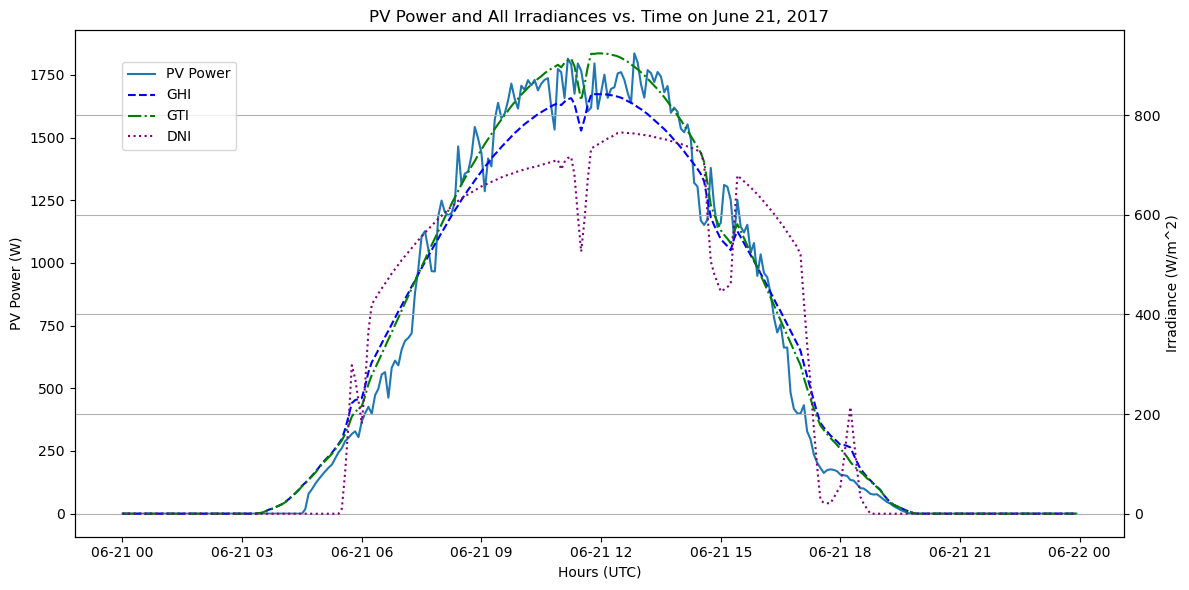

In [8]:
# Load the dataset
file_path = './FINAL_PV_POWER_5_MINS.csv'
data = pd.read_csv(file_path)

# Convert the 'TimeStamp' column to datetime format
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Filter the data for the specified time range
start_time = '2017-06-21 00:00'
end_time = '2017-06-21 23:55'
filtered_data = data[(data['TimeStamp'] >= start_time) & (data['TimeStamp'] <= end_time)]

# Remove rows with missing 'PV_Power' values
filtered_data = filtered_data.dropna(subset=['PV_Power'])

# Plot the data with different dashes for irradiances
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(filtered_data['TimeStamp'], filtered_data['PV_Power'], label='PV Power')
ax1.set_xlabel('Hours (UTC)')
ax1.set_ylabel('PV Power (W)')
ax1.tick_params(axis='y')

# Create a second y-axis to plot the irradiances with different dashes
ax2 = ax1.twinx()
ax2.plot(filtered_data['TimeStamp'], filtered_data['ghi'], color='blue', linestyle='--', label='GHI')
ax2.plot(filtered_data['TimeStamp'], filtered_data['gti'], color='green', linestyle='-.', label='GTI')
ax2.plot(filtered_data['TimeStamp'], filtered_data['dni'], color='purple', linestyle=':', label='DNI')
ax2.set_ylabel('Irradiance (W/m^2)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Title and grid
plt.title('PV Power and All Irradiances vs. Time on June 21, 2017')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#### June 2017

/var/folders/j6/g4_nh54s61724h3sb61kzrzh0000gn/T/ipykernel_15201/911692964.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])


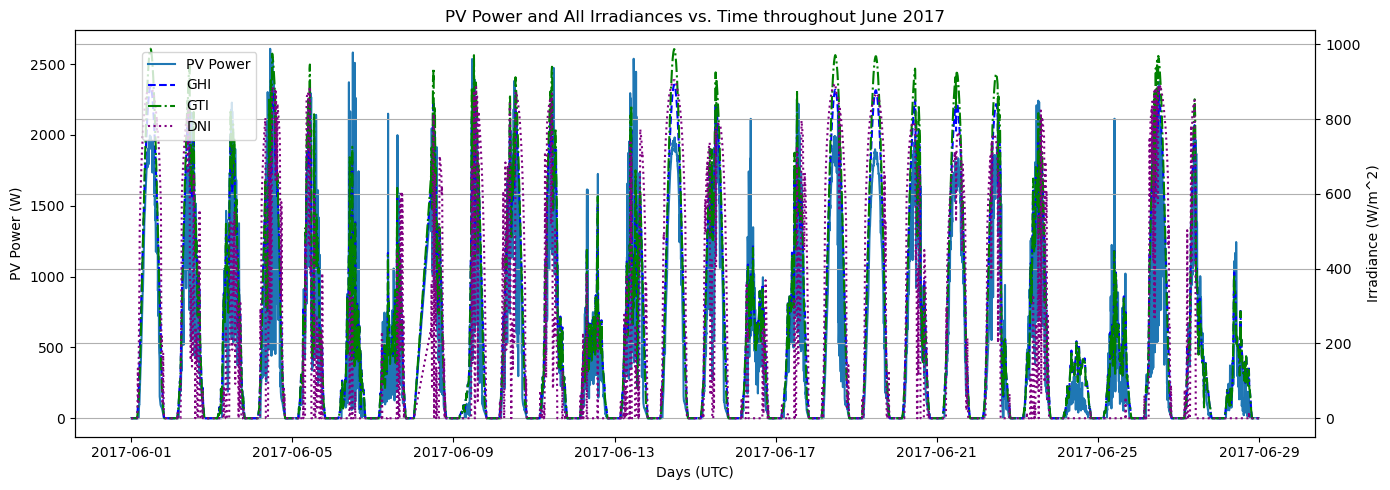

In [9]:
# Load the dataset
file_path = './FINAL_PV_POWER_5_MINS.csv'
data = pd.read_csv(file_path)

# Convert the 'TimeStamp' column to datetime format
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Filter the data for the specified time range
start_time = '2017-06-1 00:00'
end_time = '2017-06-28 23:55'
filtered_data = data[(data['TimeStamp'] >= start_time) & (data['TimeStamp'] <= end_time)]

# Remove rows with missing 'PV_Power' values
filtered_data = filtered_data.dropna(subset=['PV_Power'])

# Plot the data with different dashes for irradiances
fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.plot(filtered_data['TimeStamp'], filtered_data['PV_Power'], label='PV Power')
ax1.set_xlabel('Days (UTC)')
ax1.set_ylabel('PV Power (W)')
ax1.tick_params(axis='y')

# Create a second y-axis to plot the irradiances with different dashes
ax2 = ax1.twinx()
ax2.plot(filtered_data['TimeStamp'], filtered_data['ghi'], color='blue', linestyle='--', label='GHI')
ax2.plot(filtered_data['TimeStamp'], filtered_data['gti'], color='green', linestyle='-.', label='GTI')
ax2.plot(filtered_data['TimeStamp'], filtered_data['dni'], color='purple', linestyle=':', label='DNI')
ax2.set_ylabel('Irradiance (W/m^2)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Title and grid
plt.title('PV Power and All Irradiances vs. Time throughout June 2017')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#### All of 2017 (12 subplots representing each month)

/var/folders/j6/g4_nh54s61724h3sb61kzrzh0000gn/T/ipykernel_15201/2439798390.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])


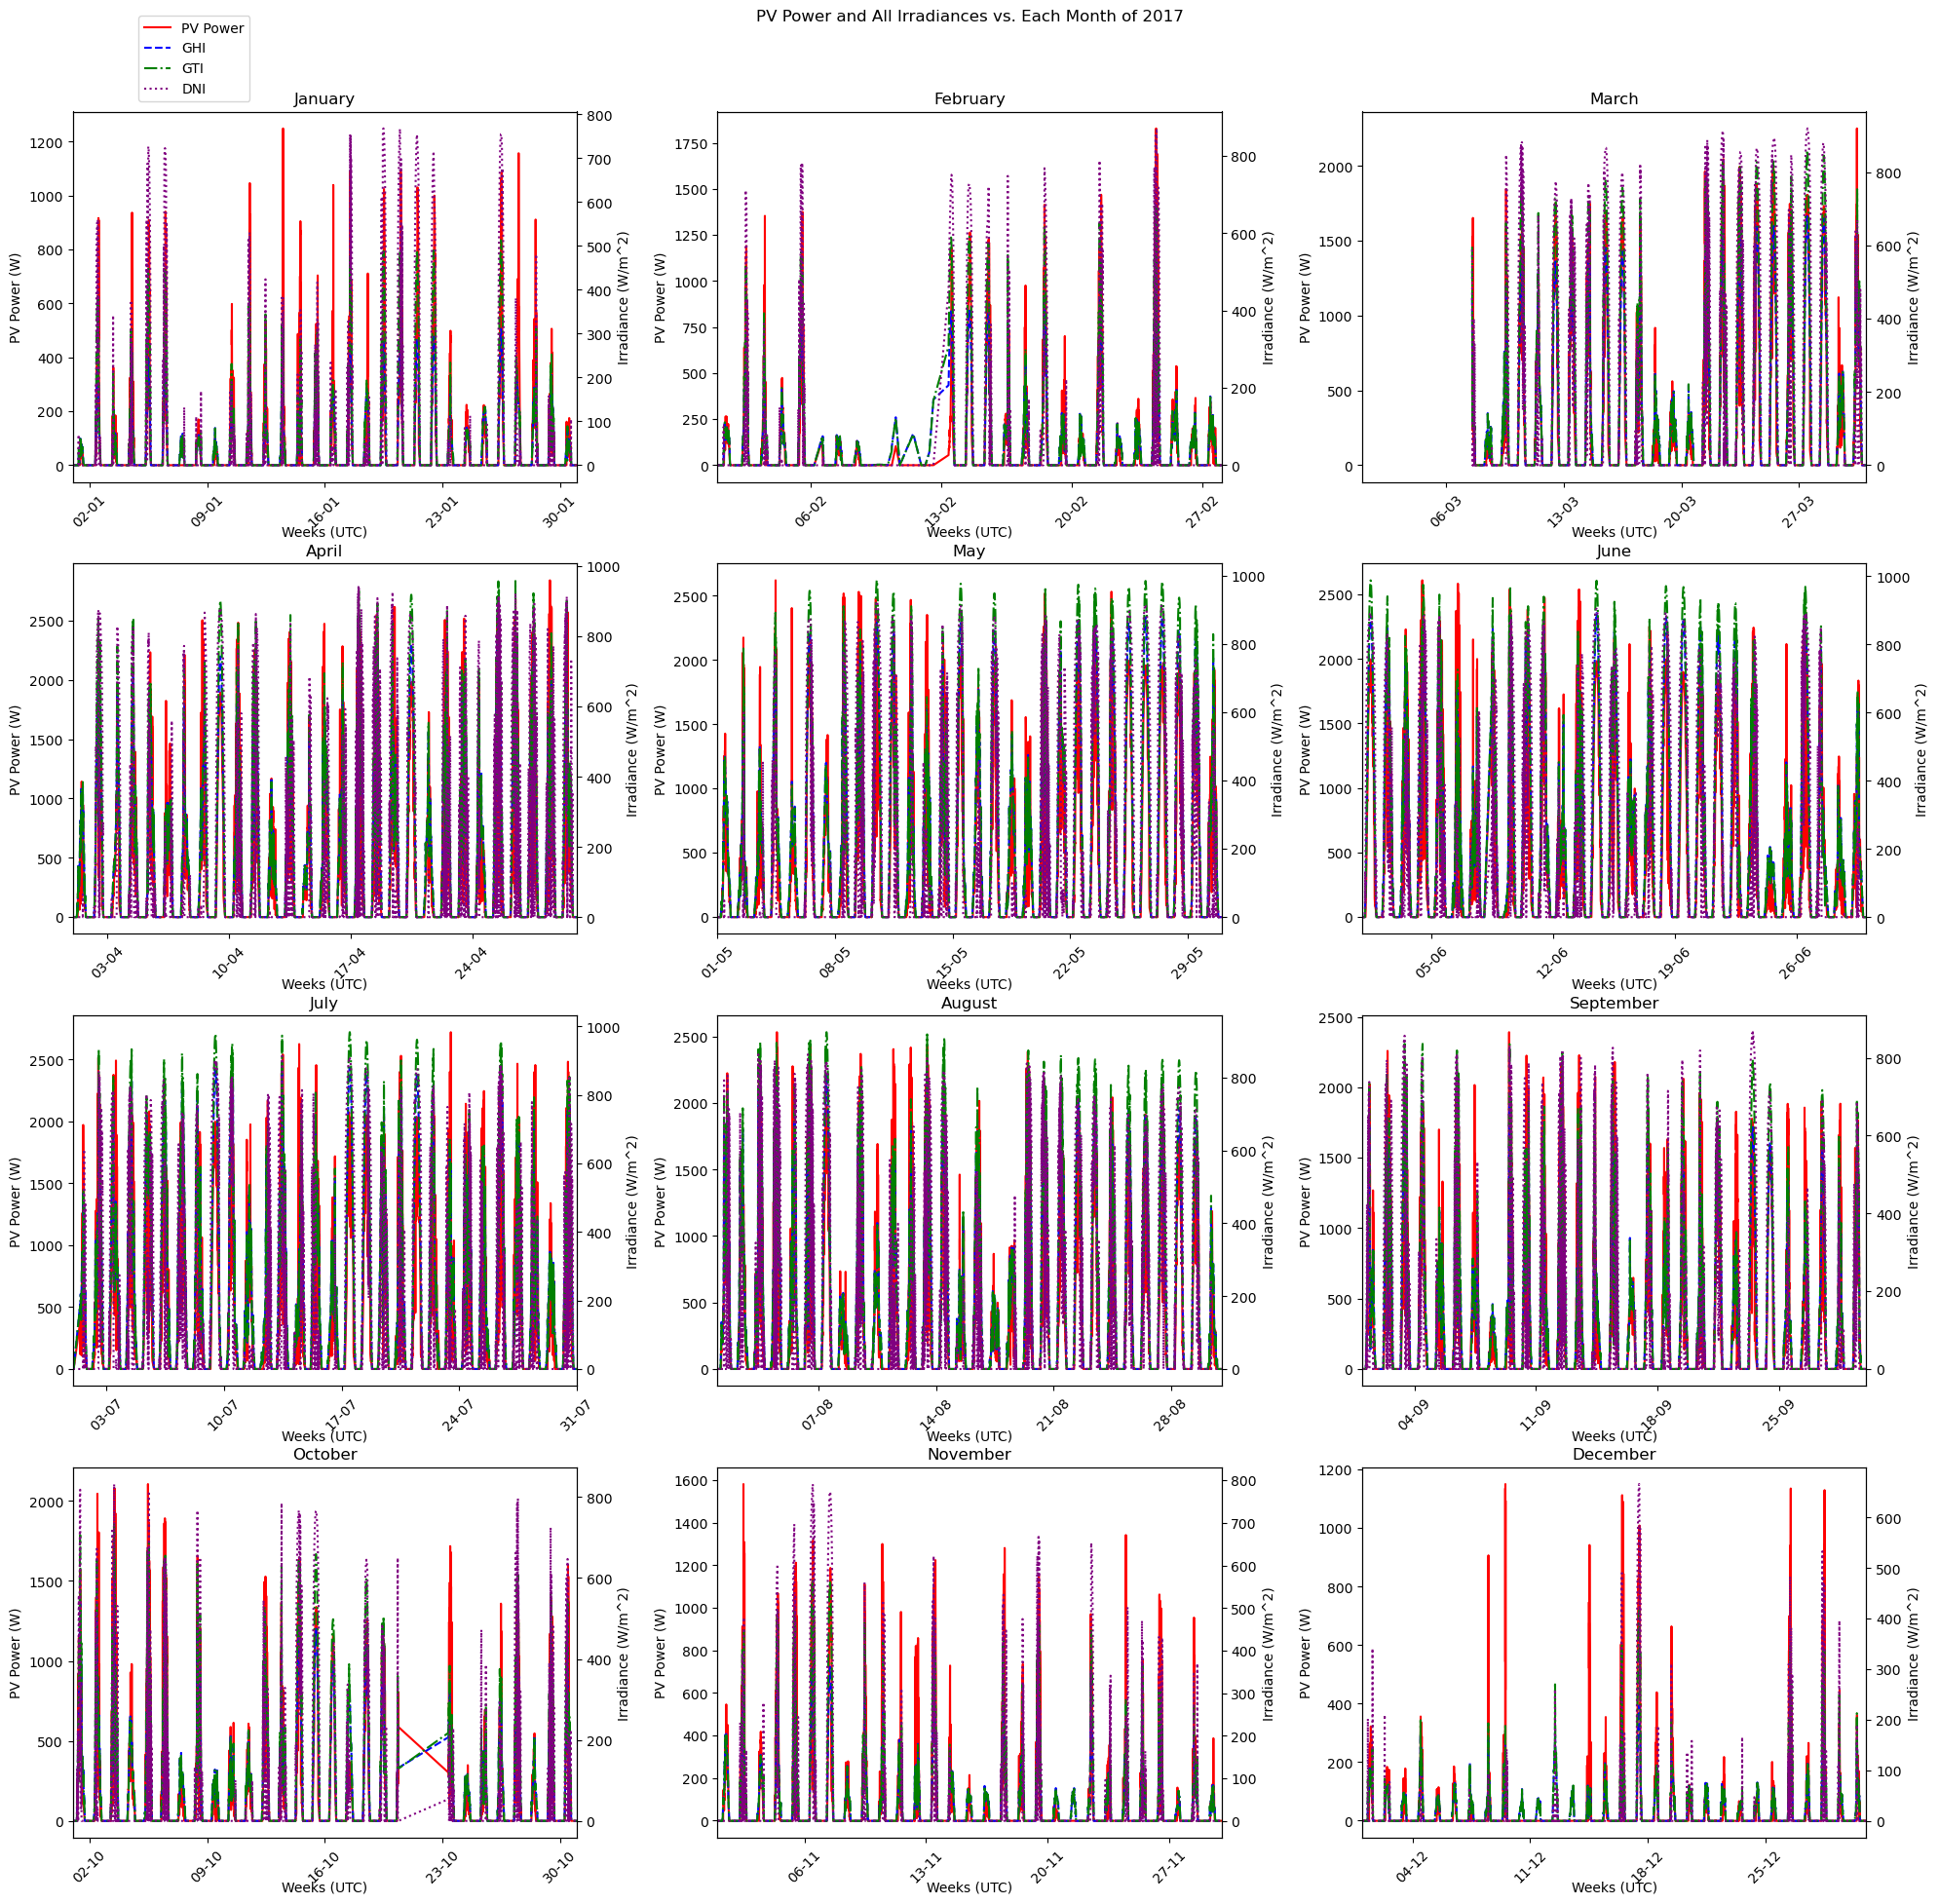

In [10]:
# Load the dataset
file_path = './FINAL_PV_POWER_5_MINS.csv'
data = pd.read_csv(file_path)

# Convert the 'TimeStamp' column to datetime format
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Filter the data for the year 2017
start_time = '2017-01-01 00:00'
end_time = '2017-12-31 23:55'
filtered_data = data[(data['TimeStamp'] >= start_time) & (data['TimeStamp'] <= end_time)]

# Remove rows with missing 'PV_Power' values
filtered_data = filtered_data.dropna(subset=['PV_Power'])

# Create subplots for each month
fig, axs = plt.subplots(4, 3, figsize=(20, 20), sharex=False)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axs = axs.flatten()

# Define month names and days for titles and x-axis limits
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# Initialize lists to store line handles and labels for the legend
lines = []
labels = []

# Plot data for each month
for month in range(1, 13):
    month_data = filtered_data[filtered_data['TimeStamp'].dt.month == month]
    
    ax1 = axs[month-1]
    ax2 = ax1.twinx()

    line1, = ax1.plot(month_data['TimeStamp'], month_data['PV_Power'], label='PV Power', color='red')
    line2, = ax2.plot(month_data['TimeStamp'], month_data['ghi'], color='blue', linestyle='--', label='GHI')
    line3, = ax2.plot(month_data['TimeStamp'], month_data['gti'], color='green', linestyle='-.', label='GTI')
    line4, = ax2.plot(month_data['TimeStamp'], month_data['dni'], color='purple', linestyle=':', label='DNI')

    if month == 1:  # Collect handles and labels from the first plot only for the legend
        lines.extend([line1, line2, line3, line4])
        labels.extend([line1.get_label(), line2.get_label(), line3.get_label(), line4.get_label()])

    ax1.set_title(month_names[month-1])
    ax1.set_ylabel('PV Power (W)')
    ax2.set_ylabel('Irradiance (W/m^2)')
    ax1.tick_params(axis='y', colors='black')
    ax2.tick_params(axis='y', colors='black')
    
    # Set x-axis limits to cover the full month and set ticks for every 7 days
    ax1.set_xlim(pd.Timestamp(f'2017-{month:02d}-01'), pd.Timestamp(f'2017-{month:02d}-{days_in_month[month-1]}'))
    ax1.xaxis.set_major_locator(WeekdayLocator(byweekday=MO, interval=1))
    ax1.xaxis.set_major_formatter(DateFormatter('%d-%m'))
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# Add a single legend for the entire figure
fig.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.07, 0.97))

# Overall title and layout adjustments
plt.suptitle('PV Power and All Irradiances vs. Each Month of 2017', y=0.97)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Set the x-axis label for the entire figure
for ax in axs:
    ax.set_xlabel('Weeks (UTC)', labelpad=-3)

# Show the plot
plt.show()

#### Boxplot of Distirbution of PV Power throughout 2017

/var/folders/j6/g4_nh54s61724h3sb61kzrzh0000gn/T/ipykernel_15201/4213183222.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(file_path, parse_dates=['TimeStamp'])


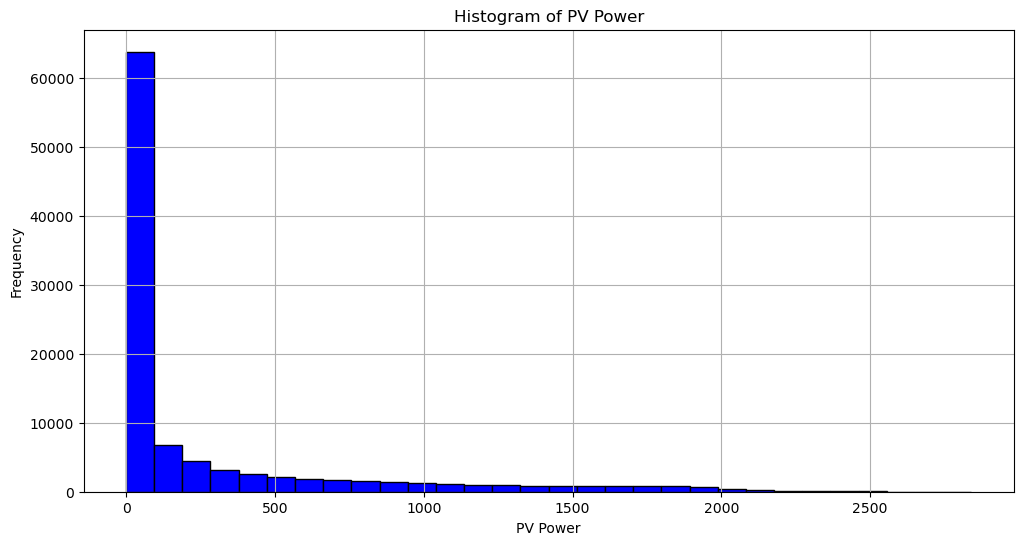

In [14]:
# Load the dataset
file_path = './FINAL_PV_POWER_5_MINS.csv'
data = pd.read_csv(file_path, parse_dates=['TimeStamp'])

# Create a histogram of PV Power
plt.figure(figsize=(12, 6))
plt.hist(data['PV_Power'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of PV Power')
plt.xlabel('PV Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()